In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('Python_Project_4_Log.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
df.Age = df.Age.fillna(df.Age.mean())


In [9]:
## Droping unwanted features
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [10]:
df = pd.get_dummies(df, drop_first=True)

In [11]:
df.head()

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [12]:
X = df.drop(['Survived'],axis=1)

In [13]:
X.head()

,Pclass,Age,Fare,Sex_male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [14]:
y = df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42,stratify=y)

## Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()

In [18]:
X_train_scaled = sc.fit_transform(X_train)
X_train_scaled

array([[-1.58920191, -0.84250504,  0.46573831,  0.73108328],
       [ 0.81973432, -0.02150134, -0.47826932,  0.73108328],
       [ 0.81973432, -0.02150134, -0.48184838, -1.36783323],
       ...,
       [ 0.81973432,  1.38282867,  0.07336222, -1.36783323],
       [-1.58920191,  1.30609303,  0.15980021,  0.73108328],
       [-1.58920191, -0.84250504, -0.09619664, -1.36783323]])

In [19]:
X_test_scaled = sc.transform(X_test)
X_test_scaled

array([[-1.58920191,  2.38039206,  0.03031714,  0.73108328],
       [ 0.81973432, -0.84250504, -0.48150053,  0.73108328],
       [ 0.81973432, -0.02150134, -0.48455572,  0.73108328],
       ...,
       [ 0.81973432, -0.68903375, -0.30958428,  0.73108328],
       [ 0.81973432,  0.231794  , -0.46560852,  0.73108328],
       [-0.3847338 ,  0.46200093, -0.37454374, -1.36783323]])

In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report, roc_curve,roc_auc_score

In [23]:
y_pred = model.predict(X_test_scaled)

In [24]:
cm = confusion_matrix(y_test, y_pred)

Text(69.0, 0.5, 'Truth')

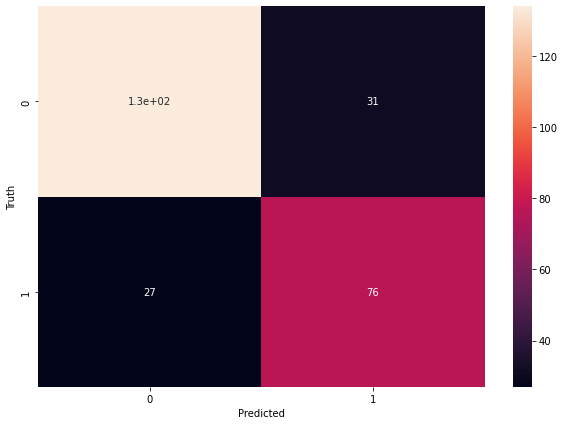

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       165
           1       0.71      0.74      0.72       103

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268



### Ploting ROC Curve

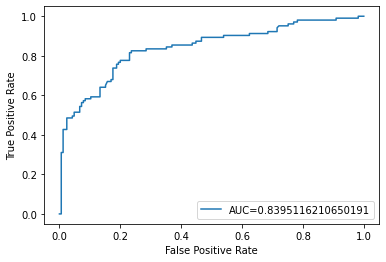

In [27]:
y_pred_proba = model.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ =roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr,tpr, label="AUC="+str(auc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

AUC more near to 1 is indication that our model is doing pretty good

In [28]:
from sklearn.svm import SVC

In [44]:
model = SVC(kernel='poly',C=5, probability=True)

In [45]:
model.fit(X_train_scaled, y_train)

SVC(C=5, kernel='poly', probability=True)

In [46]:
model.score(X_test_scaled, y_test)

0.7873134328358209

In [47]:
y_pred = model.predict(X_test_scaled)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       165
           1       0.73      0.72      0.72       103

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



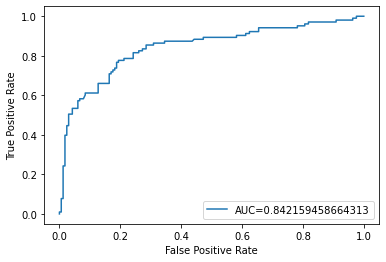

In [49]:
y_pred_proba = model.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ =roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr,tpr, label="AUC="+str(auc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()